In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')

from nltk import word_tokenize

from string import punctuation

[nltk_data] Downloading package punkt to /home/adam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# CS-E4850 Computer Vision Exercise Round 7

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  
- an  indexed  collection  of  documents  containing  the  five  terms  {'cat', 'dot', 'mammals', 'mouse', 'pet'} and 
- the percentages {5,20,2,10,60} about percentage of documents each term appears respectively.


Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

### a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2.

**inverse document frequency**
$$idf = \log \frac{N}{n_i} = \log \frac{\text{total no of doc in databas}}{\text{no of doc containing word i}}$$

In [39]:
# percentage of documents each term appears
terms = {'cat': 0.05, 
              'dog': 0.20, 
              'mammals': 0.02,
              'mouse': 0.10,
              'pet': 0.60 }

idf = {key: np.log2(1/values) for key, values in terms.items()}
idf

{'cat': 4.321928094887363,
 'dog': 2.321928094887362,
 'mammals': 5.643856189774724,
 'mouse': 3.321928094887362,
 'pet': 0.7369655941662062}

### b) Compute the term frequencies for the query and each document.

**Term frequency**

$$\text{term frequency} = \frac{\text{occurence of i in doc d}}{\text{no. of words in doc d}} $$

In [4]:
Q = ['mouse','cat','pet','mammals']
D1 = "Cat is a pet, dog is a pet, and mouse may be a pet too."
D2 = "Cat, dog and mouse are all mammals."
D3 = "Cat and dog get along well, but cat may eat a mouse."

def clean(document):
    return [word.lower() for word in word_tokenize(document) if word not in punctuation]

v1 = clean(D1)
v2 = clean(D2)
v3 = clean(D3)

print(v1)

['cat', 'is', 'a', 'pet', 'dog', 'is', 'a', 'pet', 'and', 'mouse', 'may', 'be', 'a', 'pet', 'too']


In [27]:
# let query be a document
def build_tf(document):
    N = len(document)
    tf = {}
    for unique_word in set(document):
        word_count = 0
        for word in document:
            if word == unique_word:
                word_count += 1
        tf[unique_word] = round(word_count/N,3)
    return tf

In [62]:
tf_q = build_tf(Q)
print("\nTerm frequency for Query")
print(tf_q)
tf_v1 = build_tf(v1)
print("\nTerm frequency for Document 1")
print(tf_v1)
tf_v2 = build_tf(v2)
print("\nTerm frequency for Document 2")
print(tf_v2)
tf_v3 = build_tf(v3)
print("\nTerm frequency for Document 3")
print(tf_v3)


Term frequency for Query
{'cat': 0.25, 'mouse': 0.25, 'mammals': 0.25, 'pet': 0.25}

Term frequency for Document 1
{'is': 0.133, 'and': 0.067, 'too': 0.067, 'may': 0.067, 'dog': 0.067, 'pet': 0.2, 'a': 0.2, 'mouse': 0.067, 'be': 0.067, 'cat': 0.067}

Term frequency for Document 2
{'and': 0.143, 'dog': 0.143, 'mouse': 0.143, 'all': 0.143, 'mammals': 0.143, 'are': 0.143, 'cat': 0.143}

Term frequency for Document 3
{'and': 0.083, 'well': 0.083, 'may': 0.083, 'dog': 0.083, 'mouse': 0.083, 'a': 0.083, 'eat': 0.083, 'get': 0.083, 'but': 0.083, 'along': 0.083, 'cat': 0.167}


c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>

**Term frequency – inverse document frequency**

$$t_i = \frac{n_{id}}{n_d} \log \frac{N}{n_i}$$

$$t_i = \frac{\text{occurence of i in doc d}}{\text{no. of words in doc d}} 
\times \text{idf}$$

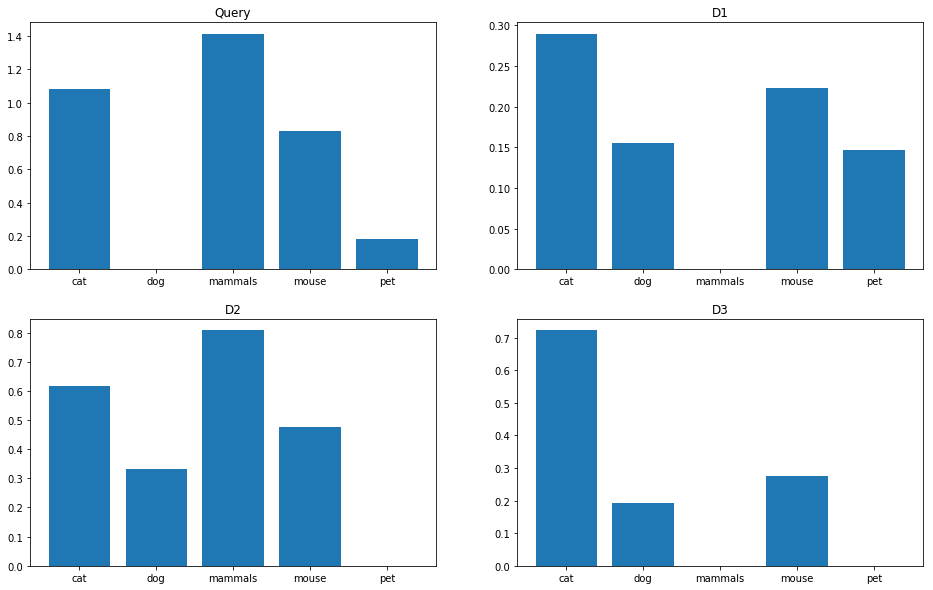

In [67]:
# ignoring other items
titles = ["Query", "D1", "D2", "D3"]

fig, axes = plt.subplots(figsize=(16,10), ncols=2, nrows=2)

tf_ls = [tf_q, tf_v1, tf_v2, tf_v3]
tf_idf_dict = {}

for i in range(len(tf_ls)):
    tf_idf = {names: 0 for names in terms}
    
    tf = tf_ls[i]
    for term in tf:
        if term in idf:
            tf_idf[term] = tf[term] * idf[term]
            
    tf_idf_dict[titles[i]] = tf_idf

    names = list(tf_idf.keys())
    values = list(tf_idf.values())

    #tick_label does the some work as plt.xticks()
    
    axes[int(i/2)][i%2].bar(range(len(tf_idf)),values,tick_label=names)
    axes[int(i/2)][i%2].set_title(titles[i])

In [68]:
from pprint import pprint
pprint(tf_idf_dict)

{'D1': {'cat': 0.2895691823574533,
        'dog': 0.15556918235745326,
        'mammals': 0,
        'mouse': 0.22256918235745327,
        'pet': 0.14739311883324124},
 'D2': {'cat': 0.6180357175688928,
        'dog': 0.3320357175688928,
        'mammals': 0.8070714351377856,
        'mouse': 0.47503571756889273,
        'pet': 0},
 'D3': {'cat': 0.7217619918461896,
        'dog': 0.19272003187565107,
        'mammals': 0,
        'mouse': 0.2757200318756511,
        'pet': 0},
 'Query': {'cat': 1.0804820237218407,
           'dog': 0,
           'mammals': 1.410964047443681,
           'mouse': 0.8304820237218405,
           'pet': 0.18424139854155155}}


### d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45)

In [79]:
def sim(query, d):
    numerator = sum([d[term] * query[term] for term in query])
    denominator = np.sqrt(sum([d[term]**2 for term in d])) * np.sqrt(sum([query[term]**2 for term in query]))
    return  numerator / denominator

In [80]:
print("Cosine similarity between Query and Document 1")
sim(tf_idf_dict['Query'], tf_idf_dict['D1'])

Cosine similarity between Query and Document 1


0.6291036970635482

In [81]:
print("Cosine similarity between Query and Document 2")
sim(tf_idf_dict['Query'], tf_idf_dict['D2'])

Cosine similarity between Query and Document 2


0.9546948111493485

In [82]:
print("Cosine similarity between Query and Document 3")
sim(tf_idf_dict['Query'], tf_idf_dict['D3'])

Cosine similarity between Query and Document 3


0.6430077230767424

### e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)

Document 2: 0.95, Document 3: 0.64, Document 1: 0.63